In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
df=pd.read_csv('train.csv')
#knn
#dataset : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [21]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [22]:
df.shape

(2000, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [25]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [27]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [28]:
for col in df:
    print(df[col].value_counts())

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64
0    1010
1     990
Name: blue, dtype: int64
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64
0.1    320
0.2    

<Axes: >

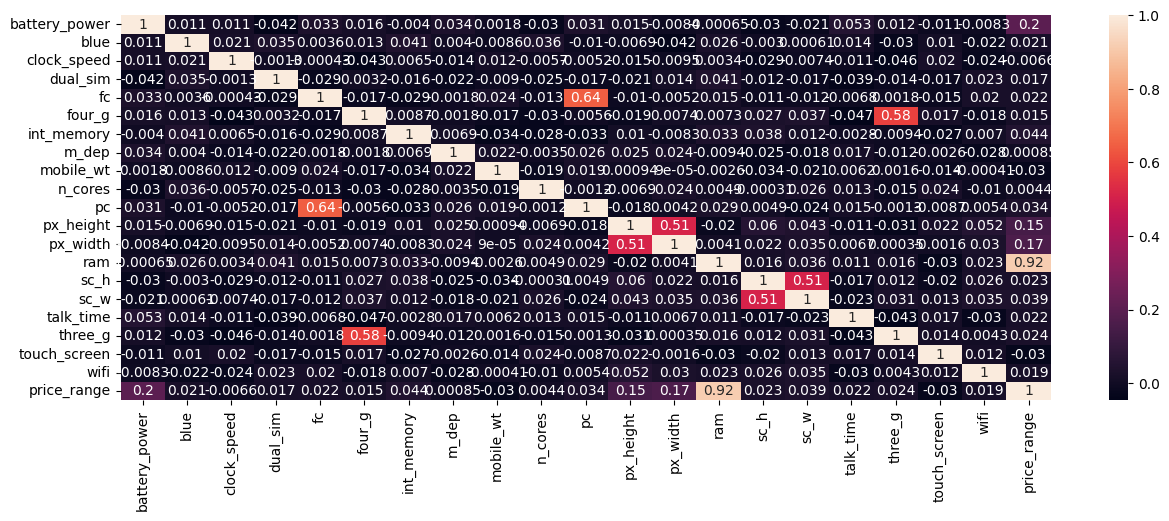

In [29]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cor, annot=True)

In [30]:
X= df.drop(['price_range'], axis=1)
y = df['price_range']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

In [32]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

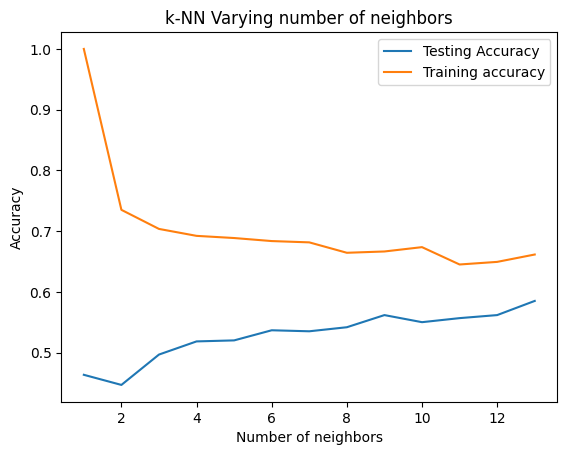

In [33]:
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
y_pred= knn.predict(x_test)
y_pred[0:5]

array([2, 0, 2, 1, 1])

In [35]:
accuracy_score(y_test , y_pred)

0.585

In [36]:
y_predTrain = knn.predict(x_train)
y_predTrain[0:5]
accuracy_score(y_train , y_predTrain)

0.6614285714285715